# Generate arbitrary signal

This example will show how to generate an arbitrary signal with fast analog outputs.

## Prepare an arbitrary signal

Lets start with generation of our arbitrary signal with will be a sum of two sines with two different frequencies.

The first thing we will do is import matplotlib and numpy so we will be able to visualize the signal before we send it to the generator.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

Now lest generate the signals and plot our outputs.

**Note:** we should take care that the generated signal does not go over 1V or under -1V as this is the operating range.

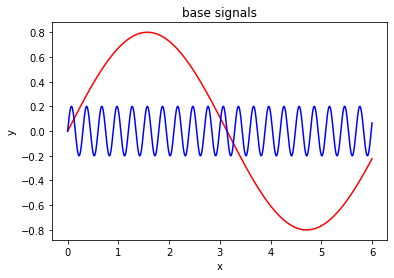

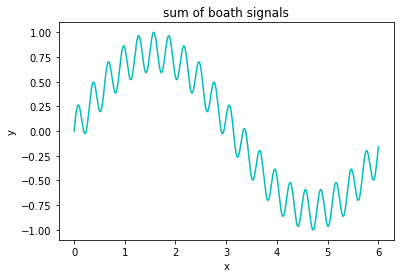

In [2]:
x  = np.linspace(0, 6, 10000) # generates x axis in range 0 to 6 with 20000 points
y1 = 0.8*np.sin(x) # the first sine signal with the amplitude 0.8
y2 = 0.2*np.sin(21*x) # the second sine signal with a frequency 20 times higher than the first one and the amplitude of 0.2

# plot both signals
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('base signals')
plt.show()


sum= y1+y2
plt.plot(x, sum, 'c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sum of both signals')
plt.show()

## Transfer data to the STEMlab

To start using the STEMlab we need to load the FPGA bitstream and device tree overlay.

In [ ]:
from redpitaya.overlay.mercury import mercury as overlay

fpga = overlay()

The next line loads the *gen* module that allows python to control generator on the STEMlab board.

In [ ]:
gen0 = fpga.gen(0)

Here we will prepare the waveform that will be stored in the buffer on the FPGA. For predefined waveforms such as sine, square and sawtooth populate the buffer with a signal where one period equals to the length of the buffer.

Lets populate the buffer with a sine wave that has the amplitude of 1V and offset of 0V.

In [ ]:
gen0.amplitude = 1.0
gen0.offset    = 0.0
gen0.waveform  = sum

Set the frequency to the output signal to 1kHz.

**NOTE:** To get correct results, waveform must be loaded before the frequency is set.

In [ ]:
gen0.mode = 'PERIODIC'
gen0.frequency = 1000

Finally we need to start the generator, enable outputs on the FPGA, and trigger signal generation.

In [ ]:
gen0.start()
gen0.enable = True
gen0.trigger()

When you are done disable the outputs by executing command below.

In [ ]:
gen0.enable = False